In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

## Exploratory Data Analysis

## Checking nulls

In [5]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No nulls present.

## Checking Data types

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

## Relationship between features and label

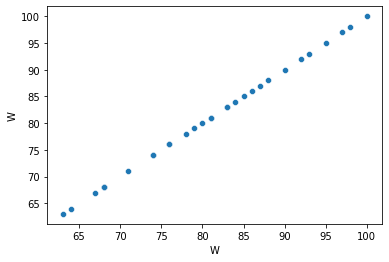

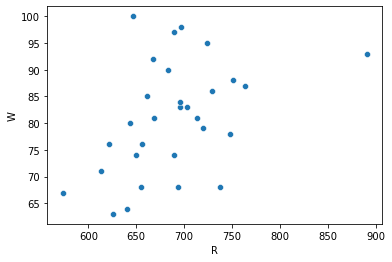

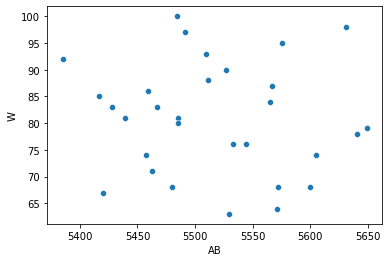

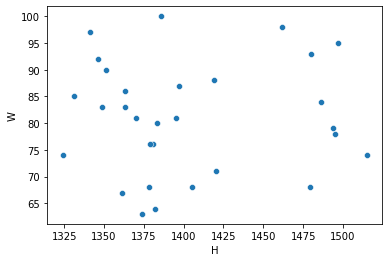

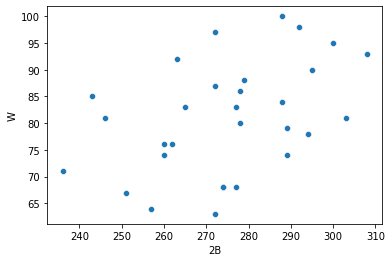

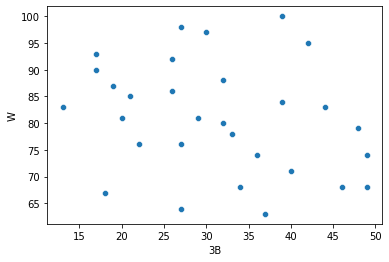

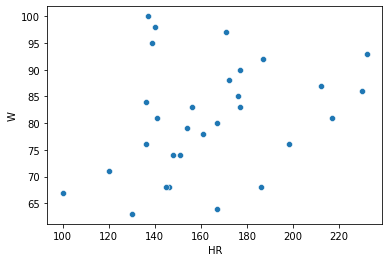

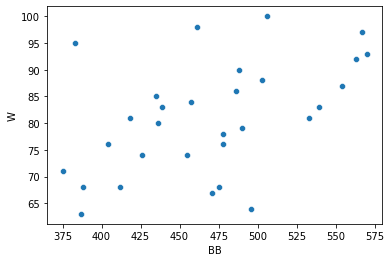

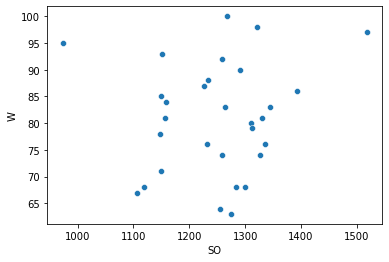

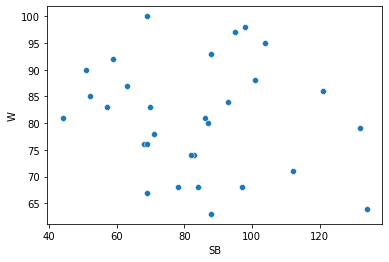

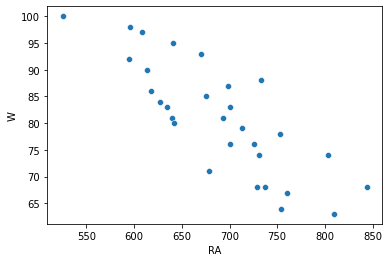

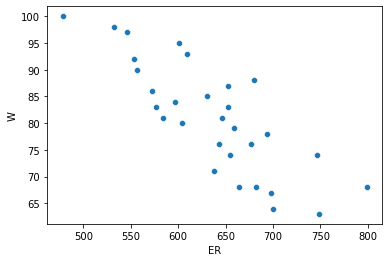

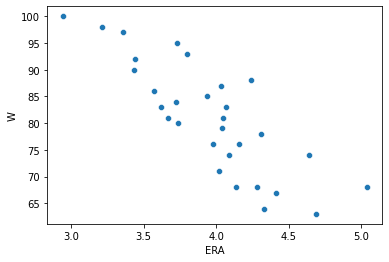

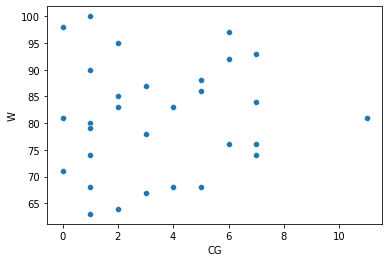

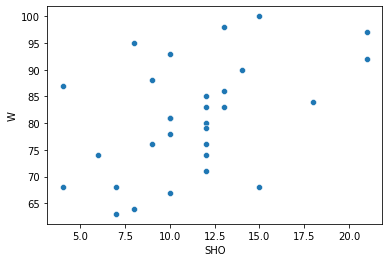

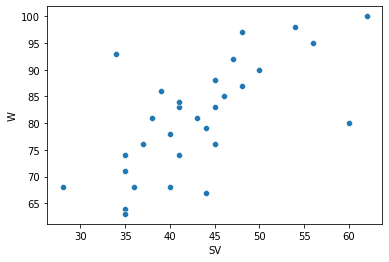

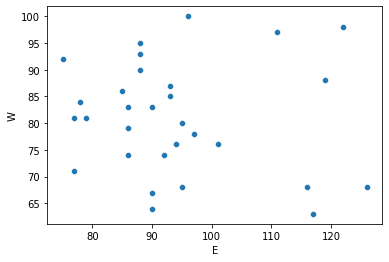

In [8]:
col=df.columns
for i in col:
    a=sns.scatterplot(x=df[i],y=df['W'],data=df)
    plt.xlabel(i)
    plt.ylabel('W')
    plt.show()

## Describing the data

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
df.corr().abs()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,0.087947,0.037612,0.427797,0.251118,0.307407,0.484342,0.111850,0.157234,0.812952,0.809435,0.819600,0.080533,0.471805,0.666530,0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,0.070072,0.671283,0.402452,0.054726,0.081367,0.041623,0.041245,0.049281,0.232042,0.103274,0.096380,0.023262
AB,0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,0.066983,0.136414,0.106022,0.372618,0.316010,0.309686,0.255551,0.080876,0.197321,0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,0.090855,0.118281,0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,0.145559,0.130371,0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,0.150752,0.195027,0.218160,0.235531,0.254854,0.306675,0.057998,0.171576,0.105754
3B,0.251118,0.070072,0.435422,0.478694,0.220490,1.000000,0.430915,0.454949,0.141196,0.457437,0.314125,0.340225,0.330951,0.065898,0.041396,0.142370,0.126678
HR,0.307407,0.671283,0.066983,0.090855,0.056292,0.430915,1.000000,0.425691,0.359923,0.136567,0.103903,0.085922,0.090917,0.156502,0.019119,0.028540,0.207597
BB,0.484342,0.402452,0.136414,0.118281,0.302700,0.454949,0.425691,1.000000,0.233652,0.098347,0.416445,0.452663,0.459832,0.462478,0.426004,0.099445,0.075685
SO,0.111850,0.054726,0.106022,0.398830,0.150752,0.141196,0.359923,0.233652,1.000000,0.030968,0.129745,0.161612,0.180368,0.093418,0.237721,0.126297,0.155133
SB,0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,0.136567,0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,0.020783,0.106563,0.183418,0.079149


<AxesSubplot:>

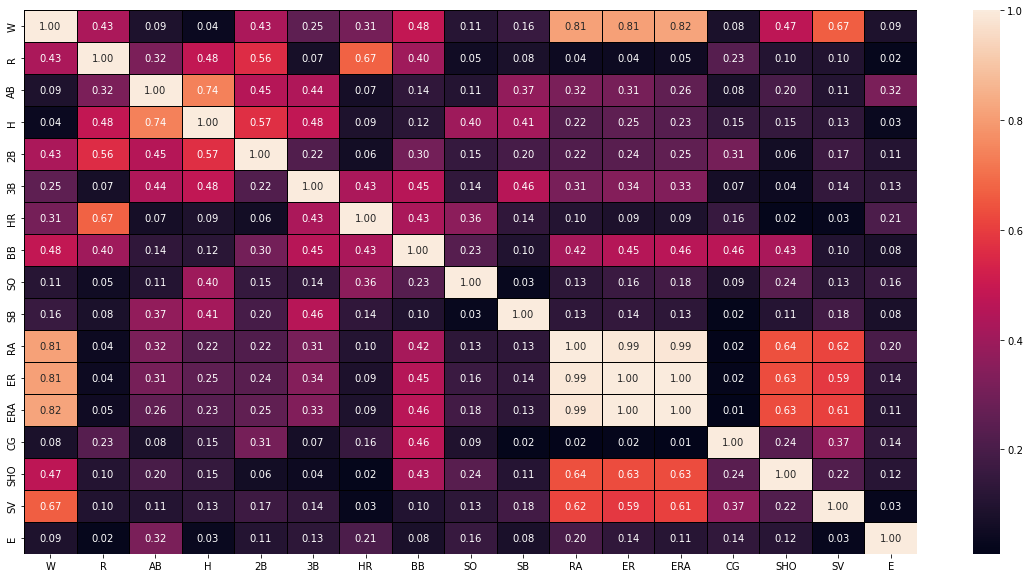

In [10]:
#Plotting heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Observation: Lot many multicollinearity exists. We will deal with it using VIF.

## VIF

In [14]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif.sort_values(by='vif')

,vif,features
13,10.411616,CG
9,28.665516,SB
5,32.435486,3B
14,33.258426,SHO
16,96.958680,E
7,302.099558,BB
6,309.301103,HR
15,331.282416,SV
8,400.292880,SO
4,1157.105781,2B


## Checking Outliers

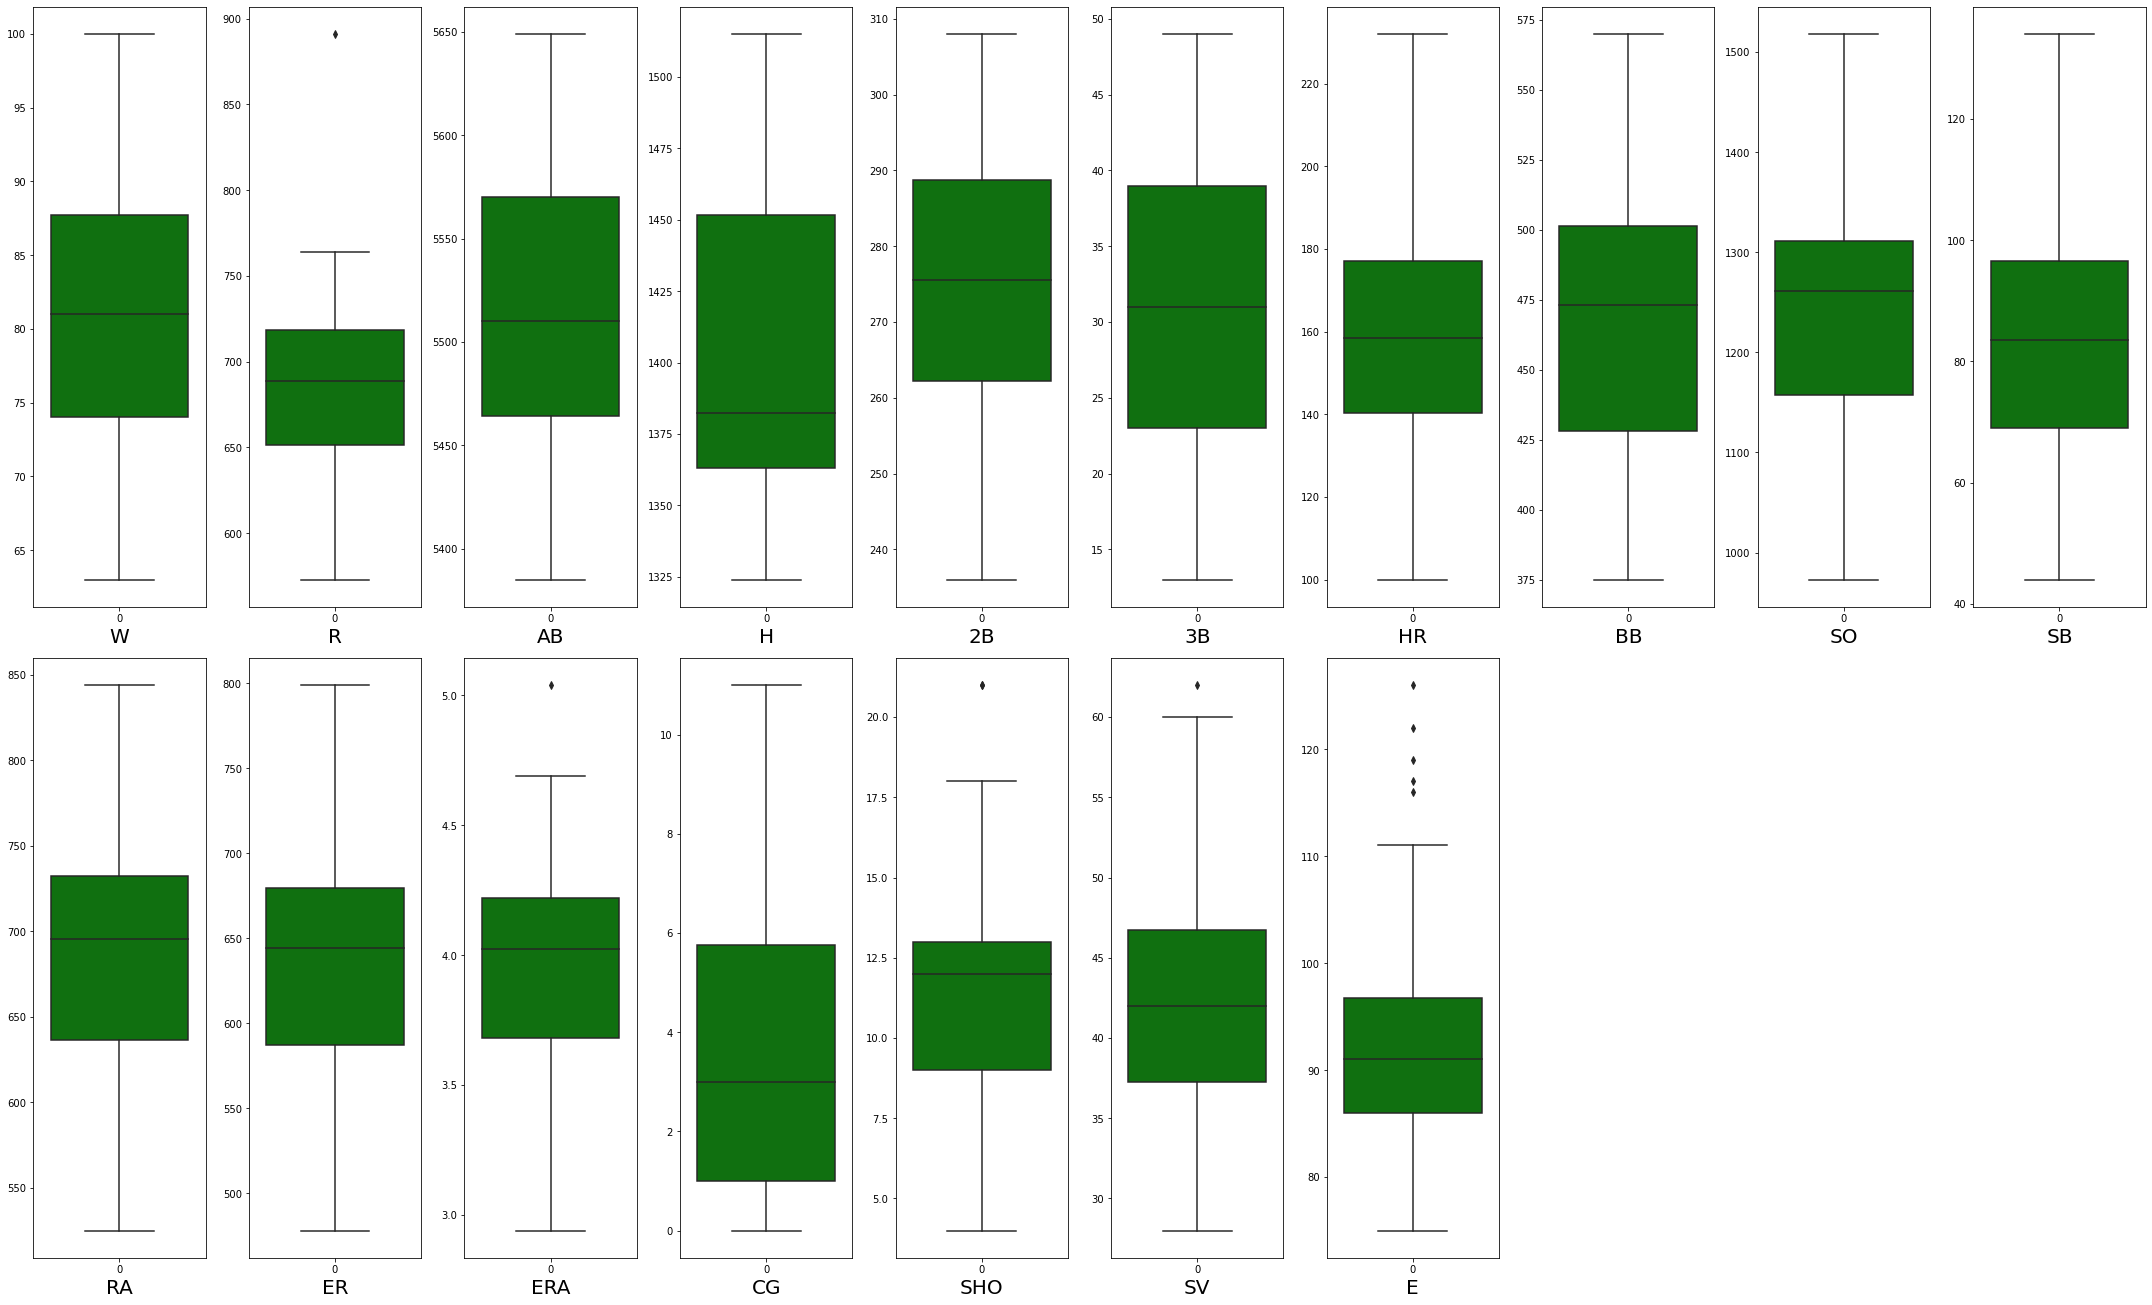

In [15]:
col=df.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

Observation: Outliers are present only in E i.e. Error.

## Checking Skewness

In [16]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

## Treating multicollinearity

Since ER has maximum vif score and is 100% related with ERA so we will just drop it and check vif again.

In [25]:
df=df.drop(['ER'],axis=1)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86


In [26]:
#Checking VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif.sort_values(by='vif')

,vif,features
12,10.313328,CG
9,27.546490,SB
5,30.345744,3B
13,32.436725,SHO
15,95.922328,E
6,239.587650,HR
14,287.323588,SV
7,299.279981,BB
8,366.553169,SO
0,1134.084626,W


Now since RA has highest vif score and is strongly correlated to ERA, we would drop RA as its relation with W is weaker than ERA relation with W.

In [27]:
df=df.drop(['RA'],axis=1)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [28]:
#Checking VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif.sort_values(by='vif')

,vif,features
11,9.381355,CG
9,26.970708,SB
12,28.811790,SHO
5,30.281934,3B
14,78.022636,E
6,238.479206,HR
13,246.949973,SV
7,259.044664,BB
8,333.976519,SO
10,704.730999,ERA


Lets drop H as it is weakly related to W as compared to AB.

In [29]:
df=df.drop(['H'],axis=1)
df.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,4.64,7,12,35,86


In [30]:
#Checking VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif.sort_values(by='vif')

,vif,features
10,8.494997,CG
8,23.199914,SB
11,26.332948,SHO
4,30.167297,3B
13,64.170441,E
5,184.310036,HR
6,219.148669,BB
12,221.912770,SV
7,327.411615,SO
9,702.684322,ERA


Let us consider these vif score and proceed with it.

## Treating Outliers

In [31]:

z=np.abs(zscore(df))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {5}


Number of rows to be eliminated-
 1


In [32]:
#Calculating Data Loss
loss=((30-1)/30)*100
print("The data loss-",100-loss,"%")

The data loss- 3.3333333333333286 %


3% data loss is acceptable lets drop this row.

In [35]:
#removing rows with outliers
df=df.drop(df.index[i[0]])
df

,W,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,4.64,7,12,35,86
7,81,713,5485,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,644,5485,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,748,5640,294,33,161,478,1148,71,4.31,3,10,40,97
10,88,751,5511,279,32,172,503,1233,101,4.24,5,9,45,119
11,86,729,5459,278,26,230,486,1392,121,3.57,5,13,39,85


## Treating skewness

In [36]:
x=df.drop(['W'],axis=1)
x

,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,289,49,151,455,1259,83,4.64,7,12,35,86
7,713,5485,246,20,217,418,1331,44,4.05,0,10,43,77
8,644,5485,278,32,167,436,1310,87,3.74,1,12,60,95
9,748,5640,294,33,161,478,1148,71,4.31,3,10,40,97
10,751,5511,279,32,172,503,1233,101,4.24,5,9,45,119
11,729,5459,278,26,230,486,1392,121,3.57,5,13,39,85


In [37]:
y=df['W']
y

0      95
1      83
2      81
3      76
4      74
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [38]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 1.10020795,  0.        ,  1.65518852,  0.97503915, -0.70557967,
        -1.60150679, -2.50285429,  0.89979141, -0.49267935, -0.29308097,
        -0.91438576,  1.52973041, -0.33940591],
       [ 0.37422821,  0.        ,  0.12784732,  1.16328665, -0.05223766,
        -0.41396294,  0.07994942, -0.55710288,  0.24573665, -0.29308097,
         0.19365806,  0.34209508, -0.52861862],
       [-0.27662584,  0.        ,  1.87529073, -0.29592052, -0.62532962,
         1.32320862, -0.93071378,  0.1788935 , -0.62368575,  1.96784205,
        -0.32964831, -0.62851734, -1.30024561],
       [-1.29914876,  0.        , -0.83030717, -0.5002485 , -0.82779731,
        -1.14030487, -0.23919123, -0.65713763,  0.05091212,  1.24416394,
        -0.61314085, -0.78589073,  0.64242607],
       [ 0.20091587,  0.        ,  0.89009943,  1.62691925, -0.23790212,
        -0.09779242,  0.03117076,  0.04868201,  1.46963866,  1.24416394,
         0.19365806, -1.117616  , -0.52861862],
       [ 0.80869603,  0.      

## Standardization of Data

In [39]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.10020795,  0.        ,  1.65518852,  0.97503915, -0.70557967,
        -1.60150679, -2.50285429,  0.89979141, -0.49267935, -0.29308097,
        -0.91438576,  1.52973041, -0.33940591],
       [ 0.37422821,  0.        ,  0.12784732,  1.16328665, -0.05223766,
        -0.41396294,  0.07994942, -0.55710288,  0.24573665, -0.29308097,
         0.19365806,  0.34209508, -0.52861862],
       [-0.27662584,  0.        ,  1.87529073, -0.29592052, -0.62532962,
         1.32320862, -0.93071378,  0.1788935 , -0.62368575,  1.96784205,
        -0.32964831, -0.62851734, -1.30024561],
       [-1.29914876,  0.        , -0.83030717, -0.5002485 , -0.82779731,
        -1.14030487, -0.23919123, -0.65713763,  0.05091212,  1.24416394,
        -0.61314085, -0.78589073,  0.64242607],
       [ 0.20091587,  0.        ,  0.89009943,  1.62691925, -0.23790212,
        -0.09779242,  0.03117076,  0.04868201,  1.46963866,  1.24416394,
         0.19365806, -1.117616  , -0.52861862],
       [ 0.80869603,  0.      

## Train test split

In [159]:
from sklearn.linear_model import LinearRegression
max_ac=0
randomState=0
lr=LinearRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
    if round(r2_score(y_test,pred_test)*100,1)>max_ac:
        randomState=i
        max_ac=round(r2_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  93.9

Test Accuracy-  88.6


At random state: 1

Train Accuracy-  96.0

Test Accuracy-  66.4


At random state: 2

Train Accuracy-  94.5

Test Accuracy-  81.8


At random state: 3

Train Accuracy-  95.5

Test Accuracy-  64.9


At random state: 4

Train Accuracy-  94.5

Test Accuracy-  78.5


At random state: 5

Train Accuracy-  94.2

Test Accuracy-  77.4


At random state: 6

Train Accuracy-  96.4

Test Accuracy-  77.5


At random state: 7

Train Accuracy-  94.4

Test Accuracy-  33.7


At random state: 8

Train Accuracy-  94.6

Test Accuracy-  89.7


At random state: 9

Train Accuracy-  96.0

Test Accuracy-  49.6


At random state: 10

Train Accuracy-  95.7

Test Accuracy-  45.3


At random state: 11

Train Accuracy-  97.4

Test Accuracy-  22.3


At random state: 12

Train Accuracy-  96.4

Test Accuracy-  -46.6


At random state: 13

Train Accuracy-  93.8

Test Accuracy-  89.0


At random state: 14

Train Accuracy-  95.0

Test Accuracy-  58.1


At

## Applying Linear Regression

In [175]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_acc=round(r2_score(y_train,pred_train)*100,1)
test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)



Train Accuracy-  94.6

Test Accuracy-  89.7


## Cross Validation Score

In [176]:
for i in range(4,7):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_acc)



At cv- 4

 cross validation score is- 46.45142736393047

 Accuracy score is- 89.7


At cv- 5

 cross validation score is- 34.31662140396255

 Accuracy score is- 89.7


At cv- 6

 cross validation score is- 46.65326621004019

 Accuracy score is- 89.7


Best cross validation score is at cv=6.

In [177]:
cv_score_best_lr=cross_val_score(lr,x,y,cv=6).mean()*100
print("cross validation score is-",cv_score_best_lr)
print("accuracy score for linear regression model is-",test_acc)

cross validation score is- 46.65326621004019
accuracy score for linear regression model is- 89.7


It seems that the model is overfitted so we will treat it using lasso technique

## Treating overfitting using lasso technique

In [178]:
from sklearn.linear_model import LassoCV,Lasso
lasscv=LassoCV(alphas=None,cv=10,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [179]:
alpha=lasscv.alpha_
alpha

0.13846119031241494

In [180]:
lassoReg=Lasso(alpha)
lassoReg.fit(x_train,y_train)

Lasso(alpha=0.13846119031241494)

In [181]:
lassoReg.score(x_train,y_train)*100

93.92713414638749

In [182]:
lassoReg_test_acc=lassoReg.score(x_test,y_test)*100
lassoReg_test_acc

89.6810504708633

## Cross Validation for Lasso Reg

In [190]:
for i in range(2,7):
    cv_score=cross_val_score(lassoReg,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",lassoReg_test_acc)



At cv- 2

 cross validation score is- 73.19522645101102

 Accuracy score is- 89.6810504708633


At cv- 3

 cross validation score is- 61.4723084603532

 Accuracy score is- 89.6810504708633


At cv- 4

 cross validation score is- 65.41537055663245

 Accuracy score is- 89.6810504708633


At cv- 5

 cross validation score is- 49.527646148198095

 Accuracy score is- 89.6810504708633


At cv- 6

 cross validation score is- 52.745238780299765

 Accuracy score is- 89.6810504708633


In [191]:
cv_score_best_lasso=cross_val_score(lassoReg,x,y,cv=2).mean()*100
print("cross validation score is-",cv_score_best_lasso)
print("accuracy score for linear regression model is-",lassoReg_test_acc)

cross validation score is- 73.19522645101102
accuracy score for linear regression model is- 89.6810504708633


## Calculating RMSE,MAE,MSE Errors

In [111]:
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 3.986091686470027
MAE:: 3.550198630289895
MSE:: 15.888926932945466


## Applying Random Forest Regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
max_ac=0
randomState=0

for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    rf_pred_train=rf.predict(x_train)
    rf_pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,rf_pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,rf_pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  92.1

Test Accuracy-  75.3


At random state: 1

Train Accuracy-  93.4

Test Accuracy-  74.7


At random state: 2

Train Accuracy-  94.1

Test Accuracy-  34.6


At random state: 3

Train Accuracy-  91.0

Test Accuracy-  54.7


At random state: 4

Train Accuracy-  94.2

Test Accuracy-  -7.8


At random state: 5

Train Accuracy-  94.0

Test Accuracy-  48.3


At random state: 6

Train Accuracy-  92.4

Test Accuracy-  54.1


At random state: 7

Train Accuracy-  94.9

Test Accuracy-  58.5


At random state: 8

Train Accuracy-  92.7

Test Accuracy-  59.6


At random state: 9

Train Accuracy-  94.0

Test Accuracy-  66.8


At random state: 10

Train Accuracy-  95.1

Test Accuracy-  58.0


At random state: 11

Train Accuracy-  96.7

Test Accuracy-  -32.8


At random state: 12

Train Accuracy-  92.7

Test Accuracy-  69.4


At random state: 13

Train Accuracy-  93.3

Test Accuracy-  59.7


At random state: 14

Train Accuracy-  94.6

Test Accuracy-  37.0


At

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=19,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(r2_score(y_train,pred_train)*100,1)
rf_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  92.1

Test Accuracy-  81.8


## Cross Validation Score

In [120]:
for i in range(2,5):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 2

 cross validation score is- 5.915191328779246

 Accuracy score is- 81.8


At cv- 3

 cross validation score is- -5.2624114218835985

 Accuracy score is- 81.8


At cv- 4

 cross validation score is- 52.66524134533795

 Accuracy score is- 81.8


Best cross validation score is at cv=4.

In [122]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=4).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest regression model is-",rf_test_acc)

cross validation score is- 52.23004038841441
accuracy score for random forest regression model is- 81.8


## Calculating RMSE,MAE,MSE Errors

In [123]:
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 4.708292330204941
MAE:: 3.8116666666666674
MSE:: 22.16801666666667


## Knn Regressor

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    knn_pred_train=knn.predict(x_train)
    knn_pred_test=knn.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,knn_pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,knn_pred_test)*100,1))



At random state: 0

Train Accuracy-  60.3

Test Accuracy-  35.8


At random state: 1

Train Accuracy-  60.3

Test Accuracy-  54.6


At random state: 2

Train Accuracy-  65.9

Test Accuracy-  29.4


At random state: 3

Train Accuracy-  58.7

Test Accuracy-  47.3


At random state: 4

Train Accuracy-  67.6

Test Accuracy-  -30.9


At random state: 5

Train Accuracy-  67.7

Test Accuracy-  66.5


At random state: 6

Train Accuracy-  73.1

Test Accuracy-  34.7


At random state: 7

Train Accuracy-  65.8

Test Accuracy-  50.4


At random state: 8

Train Accuracy-  65.6

Test Accuracy-  37.7


At random state: 9

Train Accuracy-  66.2

Test Accuracy-  34.7


At random state: 10

Train Accuracy-  65.8

Test Accuracy-  61.8


At random state: 11

Train Accuracy-  75.6

Test Accuracy-  21.3


At random state: 12

Train Accuracy-  70.5

Test Accuracy-  58.6


At random state: 13

Train Accuracy-  70.1

Test Accuracy-  60.9


At random state: 14

Train Accuracy-  67.6

Test Accuracy-  22.4


At

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(r2_score(y_train,pred_train)*100,1)
knn_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  70.6

Test Accuracy-  69.4


## Cross Validation Score

In [150]:
for i in range(4,10):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_test_acc)



At cv- 4

 cross validation score is- 26.734216735519688

 Accuracy score is- 69.4


At cv- 5

 cross validation score is- 5.391424180853086

 Accuracy score is- 69.4


At cv- 6

 cross validation score is- 1.6940306454389968

 Accuracy score is- 69.4


At cv- 7

 cross validation score is- -17.815679327538433

 Accuracy score is- 69.4


At cv- 8

 cross validation score is- -13.879807535331295

 Accuracy score is- 69.4


At cv- 9

 cross validation score is- -1888.0514395329499

 Accuracy score is- 69.4


So we are getting the least difference between cross_val_score and accuracy score at cv=4

In [151]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=4).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for K Nearest classifier model is-",knn_test_acc)

cross validation score is- 26.734216735519688
accuracy score for K Nearest classifier model is- 69.4


## Calculating RMSE,MAE,MSE Errors

In [75]:
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 3.649657518178934
MAE:: 3.133333333333335
MSE:: 13.320000000000014


## Model Summary

In [192]:
models=['Linear Regression','Lasso Reg','Random Forest Regressor','Knn Regressor']
test_accuracy=[test_acc,lassoReg_test_acc,rf_test_acc,knn_test_acc]
cv_score=[cv_score_best_lr,cv_score_best_lasso,cv_score_best_rf,cv_score_best_knn]
df=pd.DataFrame(list(zip(models,test_accuracy,cv_score)),columns=['Models','Test Accuracy','CV Score'])
df

,Models,Test Accuracy,CV Score
0,Linear Regression,89.70000,46.653266
1,Lasso Reg,89.68105,73.195226
2,Random Forest Regressor,81.80000,52.230040
3,Knn Regressor,69.40000,26.734217


## Looking above we could observe that the best performing model is Lasso Regressor as this model has least difference between accuracy score and cv score.

## Hyperparameter tuning on Lasso Regressor

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=0.20)
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
laReg=Lasso()
la=GridSearchCV(laReg, param_grid=lasso_params)
la.fit(x_train,y_train)
la.best_estimator_,

(Lasso(alpha=0.03),)

In [197]:
lR=Lasso(alpha=0.03)
lR.fit(x_train,y_train)

Lasso(alpha=0.03)

In [198]:
lR.score(x_train,y_train)*100

94.59728619654203

In [200]:
lR.score(x_test,y_test)*100

89.69417595465494

Accuracy didnot improve so now we will roll back to our previous Lasso regressor and save it.

## Model Saving

In [201]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(lassoReg, open(filename, 'wb'))